In [1]:
%load_ext autoreload
%autoreload 2
from Environment import Environment
from LoadBalancer import LoadBalancer
from Source import Source

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Running simple simulation
- 10 servers fixed
- arrivalProb 0.5 fixed
- two arrival types
- time limit 10

In [2]:
stopTime = 10*60*60
samplingInterval = 0.05
env = Environment(stopTime=stopTime)
loadBalancer = LoadBalancer(nServers=10, environment=env)
requestTypes = [(0.5,1,0.1,10),(0.5,2,0.2,10)] #(prob, mu, sigma, cancelTime)
arrivalProb = 0.7
source = Source(samplingInterval, arrivalProb, requestTypes, loadBalancer, env)
source.scheduleNextSampleEvent()
env.run(debug=False)

## Checking results

Cost of running the system: 451218.99999851536


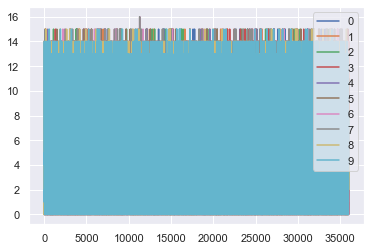

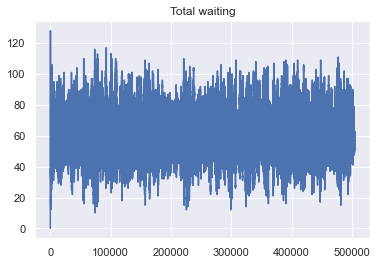

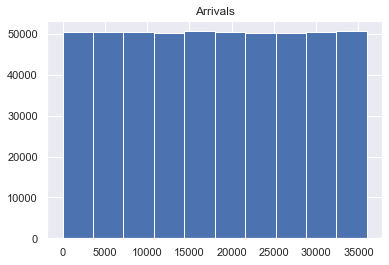

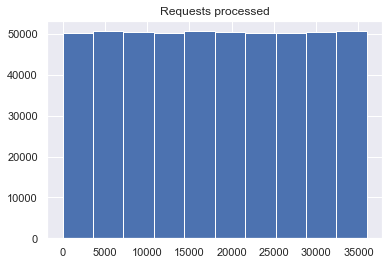

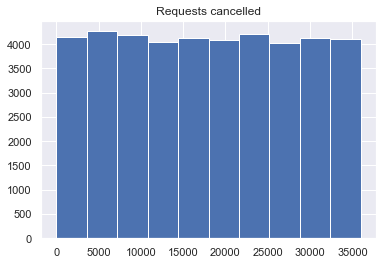

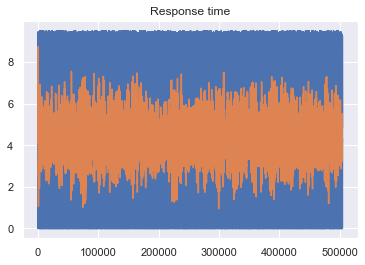

In [3]:
def plotSimulationSummary(environment: Environment, nServers=10):
    processCost = 1
    cancelCost = -10
    serverCost = 1

    nCancelled = len(environment.log['requestCancelled']) if 'requestCancelled' in environment.log.keys() else 0
    cost = len(environment.log['requestProcessed']) *1 + nCancelled * -10 + nServers*env.currentTime*serverCost
    print(f"Cost of running the system: {cost}")
    queueSizeKeys = [key for key in environment.log.keys() if 'queueSize' in key]
    for key in queueSizeKeys:
        sns.lineplot(x=environment.logTime[key], y=environment.log[key])
    plt.legend(labels=[key.strip("queueSize_") for key in queueSizeKeys])

    plt.figure()
    plt.plot(environment.log["totalInQueue"])
    plt.title("Total waiting")

    plt.figure()
    plt.hist(environment.logTime["arrivalEvent"])
    plt.title("Arrivals")

    plt.figure()
    plt.hist(environment.logTime["requestProcessed"])
    plt.title("Requests processed")

    if 'requestCancelled' in environment.log.keys():
        plt.figure()
        plt.hist(environment.logTime["requestCancelled"])
        plt.title("Requests cancelled")

    plt.figure()
    plt.plot(environment.log["requestWaitingTime"])
    rolling = pd.Series(index=environment.logTime["requestWaitingTime"], data=environment.log["requestWaitingTime"]).rolling(100).mean()
    plt.plot(rolling.values)
    plt.title("Response time")


plotSimulationSummary(environment=env)
